In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [32]:
df_selction = pd.read_csv(r'C:\Users\hp\Desktop\Rahul\Project Data\Risk Model\Risk.csv')
df_selction.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO.TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,0


In [33]:
df_selction.columns

Index(['CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE',
       'RADIO.TV', 'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT',
       'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
       'MALE_MAR_or_WID', 'CO.APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT',
       'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE',
       'FOREIGN', 'RESPONSE'],
      dtype='object')

In [34]:
X_sel = df_selction.drop('RESPONSE',axis=1)
y_sel = df_selction['RESPONSE']
X_train_sel,X_test_sel,y_train_sel,y_test_sel = train_test_split(X_sel,y_sel,test_size=0.20,random_state=42)

In [35]:
df_selction.corr()['RESPONSE'].sort_values(ascending=False)     # Correlation Method

RESPONSE            1.000000
CHK_ACCT            0.350847
HISTORY             0.228785
SAV_ACCT            0.178943
OWN_RES             0.134589
REAL_ESTATE         0.119300
EMPLOYMENT          0.116002
RADIO.TV            0.106922
USED_CAR            0.099791
AGE                 0.091127
FOREIGN             0.082079
MALE_SINGLE         0.080677
GUARANTOR           0.055039
NUM_CREDITS         0.045732
TELEPHONE           0.036466
MALE_MAR_or_WID     0.019630
NUM_DEPENDENTS      0.003015
PRESENT_RESIDENT   -0.002967
FURNITURE          -0.020971
JOB                -0.032735
RETRAINING         -0.036129
MALE_DIV           -0.050063
CO.APPLICANT       -0.062728
EDUCATION          -0.070088
INSTALL_RATE       -0.072404
RENT               -0.092785
NEW_CAR            -0.096900
OTHER_INSTALL      -0.113285
PROP_UNKN_NONE     -0.125750
AMOUNT             -0.154739
DURATION           -0.214927
Name: RESPONSE, dtype: float64

In [37]:
from sklearn.feature_selection import VarianceThreshold

In [38]:
X_sel.columns

Index(['CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE',
       'RADIO.TV', 'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT',
       'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
       'MALE_MAR_or_WID', 'CO.APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT',
       'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE',
       'FOREIGN'],
      dtype='object')

In [39]:
threshold_value = .5                                    # VarianceThreshold Method
selector = VarianceThreshold(threshold=threshold_value)
X_high_variance = selector.fit_transform(X_sel)

In [40]:
print("\nDataset after Variance Thresholding (Threshold = {}):".format(threshold_value))
df_high_variance = pd.DataFrame(X_high_variance, columns=X_sel.columns[selector.get_support()])
print(df_high_variance)


Dataset after Variance Thresholding (Threshold = 0.5):
     CHK_ACCT  DURATION  HISTORY  AMOUNT  SAV_ACCT  EMPLOYMENT  INSTALL_RATE  \
0           0         6        4    1169         4           4             4   
1           1        48        2    5951         0           2             2   
2           3        12        4    2096         0           3             2   
3           0        42        2    7882         0           3             2   
4           0        24        3    4870         0           2             3   
..        ...       ...      ...     ...       ...         ...           ...   
995         3        12        2    1736         0           3             3   
996         0        30        2    3857         0           2             4   
997         3        12        2     804         0           4             4   
998         0        45        2    1845         0           2             4   
999         1        45        4    4576         1           0  

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()

In [43]:
rfe = RFE(model, n_features_to_select=15)
fit = rfe.fit(X_train_sel,y_train_sel)

In [44]:
selected_features = fit.support_         # RFE Method 
print("Selected Features:", selected_features)


Selected Features: [ True False  True  True  True  True  True  True False False False False
 False False  True False False  True False  True  True False  True  True
 False  True False False False  True]


In [45]:
import shap
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_sel,y_train_sel)

RandomForestClassifier()

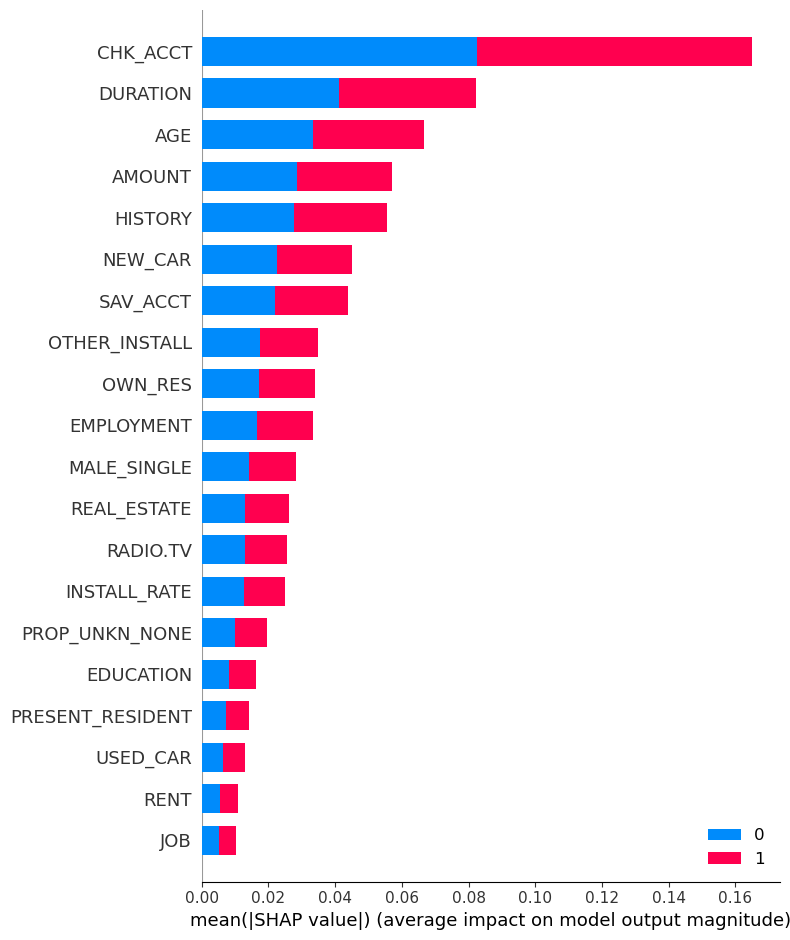

In [47]:
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_sel)

# Plot summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test_sel, feature_names = X_sel.columns, class_names=y_sel)

In [48]:
rf_model.fit(X_train_sel,y_train_sel.values.ravel())
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_sel.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

Feature Importance:
             Feature  Importance
9             AMOUNT    0.130863
21               AGE    0.106393
0           CHK_ACCT    0.100770
1           DURATION    0.090867
2            HISTORY    0.065094
11        EMPLOYMENT    0.050423
10          SAV_ACCT    0.044440
12      INSTALL_RATE    0.042554
18  PRESENT_RESIDENT    0.040286
26               JOB    0.031494
22     OTHER_INSTALL    0.023487
25       NUM_CREDITS    0.022961
3            NEW_CAR    0.021286
28         TELEPHONE    0.021182
19       REAL_ESTATE    0.020601
14       MALE_SINGLE    0.020504
24           OWN_RES    0.018975
6           RADIO.TV    0.017496
20    PROP_UNKN_NONE    0.014229
5          FURNITURE    0.013912
8         RETRAINING    0.013038
23              RENT    0.012708
7          EDUCATION    0.012329
15   MALE_MAR_or_WID    0.012091
27    NUM_DEPENDENTS    0.011641
17         GUARANTOR    0.010718
4           USED_CAR    0.010499
16      CO.APPLICANT    0.007838
13          MALE_DIV   

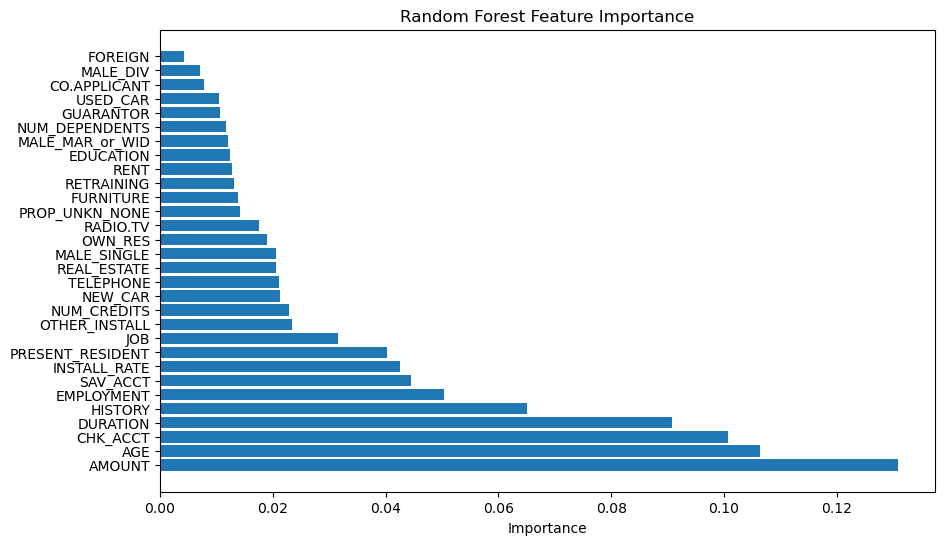

In [49]:
print("Feature Importance:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()